In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(log_dir='pt_logs')
# Load the dataset and perform exploratory data analysis
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
digits = load_digits()


2023-03-09 12:06:33.913784: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-09 12:06:41.950274: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2023-03-09 12:06:41.950929: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib/cuda/include:/usr/lib/cuda/lib64:
2023-03-09 12:06:41.950966: W tensorflow/com

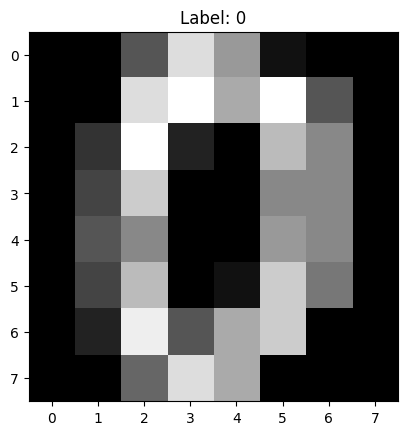

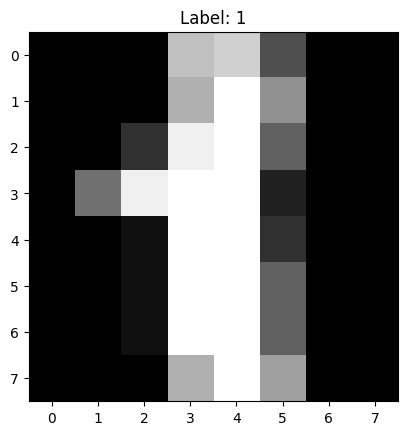

In [2]:
# Plot some examples of the images
for i in range(2):
    plt.imshow(digits.images[i], cmap='gray')
    plt.title(f"Label: {digits.target[i]}")
    plt.show()


In [3]:
# Prepare the data for training
X = digits.images.reshape(-1, 64)
y = digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
train_dataset = TensorDataset(torch.tensor(X_train, dtype=torch.float32), torch.tensor(y_train, dtype=torch.long))
test_dataset = TensorDataset(torch.tensor(X_test, dtype=torch.float32), torch.tensor(y_test, dtype=torch.long))
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [4]:
# Define the model
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(64, 128)
        self.fc2 = nn.Linear(128, 10)
        self.relu = nn.ReLU()
        self.softmax = nn.LogSoftmax(dim=1)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.softmax(x)
        return x

In [5]:
# Train the model
model = MLP()
criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

for epoch in range(100):
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        writer.add_scalar('Loss/train', loss.item(), epoch)
        # writer.add_scalar('Loss/test', , epoch)
        # writer.add_scalar('Accuracy', , epoch)
        # writer.add_scalar('Accuracy/test', , epoch)
    print(f"[{epoch + 1}] Loss: {running_loss / (i + 1)}")

# Evaluate the model on the test data
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        inputs, labels = data
        outputs = model


[1] Loss: 1.592380028963089
[2] Loss: 0.649315869808197
[3] Loss: 0.4347398176789284
[4] Loss: 0.3392764687538147
[5] Loss: 0.27617189288139343
[6] Loss: 0.24712153077125548
[7] Loss: 0.21180179119110107
[8] Loss: 0.1875649057328701
[9] Loss: 0.17543332614004611
[10] Loss: 0.16138746738433837
[11] Loss: 0.14857381153851748
[12] Loss: 0.13803353644907473
[13] Loss: 0.12862411849200725
[14] Loss: 0.12184445336461067
[15] Loss: 0.11343474499881268
[16] Loss: 0.1065724479034543
[17] Loss: 0.10246683210134507
[18] Loss: 0.09786297082901001
[19] Loss: 0.09356781095266342
[20] Loss: 0.08908316884189844
[21] Loss: 0.08373698685318232
[22] Loss: 0.0817900188267231
[23] Loss: 0.07924287654459476
[24] Loss: 0.07657895740121604
[25] Loss: 0.07248604223132134
[26] Loss: 0.07049430534243584
[27] Loss: 0.06765387952327728
[28] Loss: 0.06475990097969771
[29] Loss: 0.06229630531743169
[30] Loss: 0.06184431537985802
[31] Loss: 0.05866406494751573
[32] Loss: 0.05598699143156409
[33] Loss: 0.0553140107542